<a href="https://colab.research.google.com/github/teenwolf395/L3/blob/main/L3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
#import numpy as np

def smart_csv_import(csv_file, db_file, table_name):
    """
    Умный импорт с определением типов данных используя executemany
    """
    # Используем pandas для анализа типов данных
    df = pd.read_csv(csv_file)

    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()

    # Создаем SQL для таблицы на основе типов данных
    columns_sql = ['id INTEGER PRIMARY KEY AUTOINCREMENT']

    for column in df.columns:
        dtype = str(df[column].dtype)
        if 'int' in dtype:
            sql_type = 'INTEGER'
        elif 'float' in dtype:
            sql_type = 'REAL'
        else:
            sql_type = 'TEXT'
        columns_sql.append(f'"{column}" {sql_type}')

    # Удаляем старую таблицу если существует
    cursor.execute(f'DROP TABLE IF EXISTS {table_name}')

    create_table_sql = f'''
        CREATE TABLE {table_name} (
            {', '.join(columns_sql)}
        )
    '''
    cursor.execute(create_table_sql)

    # Подготавливаем данные для executemany
    # Заменяем NaN значения на None и преобразуем в список кортежей
    data_for_insert = []
    for _, row in df.iterrows():
        cleaned_row = [None if pd.isna(x) else x for x in row]
        data_for_insert.append(tuple(cleaned_row))

    # Вставляем данные используя executemany
    placeholders = ', '.join(['?' for _ in df.columns])
    columns = [f'"{col}"' for col in df.columns]
    insert_sql = f'INSERT INTO {table_name} ({", ".join(columns)}) VALUES ({placeholders})'

    cursor.executemany(insert_sql, data_for_insert)

    conn.commit()
    conn.close()
    print(f"Импортировано {len(df)} записей в таблицу {table_name}\n")

# Использование
smart_csv_import('movies.csv', 'mydatabase.db', 'movlist')





# Пример 2: Выбор определенных столбцов и фильтрация результатов
conn = sqlite3.connect('mydatabase.db')
cursor = conn.cursor()
cursor.execute("SELECT name, year, director, company, score FROM movlist WHERE score > 8.5")
result = cursor.fetchall()
print("Movies with rating higher than 8.5:\n")
for row in result:
    print(row)

cursor.execute("SELECT name,genre,country,year FROM movlist WHERE year > 2017")
result = cursor.fetchall()
print("\nMovies from 2017 and older:\n")
for row in result:
    print(row)

cursor.execute("SELECT name, year,genre,country, score FROM movlist WHERE country != 'United States'")
result = cursor.fetchall()
print("\nMovies made not in The United States:\n")
for row in result:
    print(row)

conn.close()

Импортировано 7668 записей в таблицу movlist

Movies with rating higher than 8.5:

('Star Wars: Episode V - The Empire Strikes Back', 1980, 'Irvin Kershner', 'Lucasfilm', 8.7)
('Goodfellas', 1990, 'Martin Scorsese', 'Warner Bros.', 8.7)
('The Silence of the Lambs', 1991, 'Jonathan Demme', 'Strong Heart/Demme Production', 8.6)
("Schindler's List", 1993, 'Steven Spielberg', 'Universal Pictures', 8.9)
('The Shawshank Redemption', 1994, 'Frank Darabont', 'Castle Rock Entertainment', 9.3)
('Pulp Fiction', 1994, 'Quentin Tarantino', 'Miramax', 8.9)
('Forrest Gump', 1994, 'Robert Zemeckis', 'Paramount Pictures', 8.8)
('Se7en', 1995, 'David Fincher', 'Cecchi Gori Pictures', 8.6)
('Life Is Beautiful', 1997, 'Roberto Benigni', 'Melampo Cinematografica', 8.6)
('Saving Private Ryan', 1998, 'Steven Spielberg', 'Dreamworks Pictures', 8.6)
('The Matrix', 1999, 'Lana Wachowski', 'Warner Bros.', 8.7)
('Fight Club', 1999, 'David Fincher', 'Fox 2000 Pictures', 8.8)
('The Green Mile', 1999, 'Frank Darabon

In [6]:
conn = sqlite3.connect('mydatabase.db')
cursor = conn.cursor()
# Сумма бюджета по годам
cursor.execute('''
    SELECT year, SUM(gross) as total_gross
    FROM movlist
    WHERE year IS NOT NULL AND budget > 0
    GROUP BY year
    ORDER BY total_gross DESC
''')

print("Сумма сборов по годам:")
for year, budget_sum in cursor.fetchall():
    if budget_sum:  # Проверка на NULL
        print(f"  {year}: ${budget_sum:,.2f}")

Сумма сборов по годам:
  2016: $27,848,414,673.00
  2019: $27,692,715,644.00
  2017: $27,679,802,575.00
  2018: $27,558,520,701.00
  2015: $26,216,913,808.00
  2014: $26,199,023,290.00
  2013: $25,699,664,932.00
  2012: $25,185,791,830.00
  2011: $23,968,305,935.00
  2009: $22,640,002,784.00
  2010: $21,788,465,230.00
  2008: $20,914,301,224.00
  2007: $19,257,733,694.00
  2004: $18,124,700,186.00
  2006: $17,876,724,012.00
  2005: $17,377,989,090.00
  2003: $17,200,870,996.00
  2002: $16,440,765,103.00
  2001: $15,420,553,278.00
  1999: $13,383,267,531.00
  2000: $13,196,367,385.00
  1997: $12,667,816,516.00
  1998: $10,856,501,457.00
  1996: $9,074,476,912.00
  1995: $8,532,835,288.00
  1994: $8,355,768,724.00
  1993: $7,280,123,383.00
  1992: $6,484,569,917.00
  1990: $6,080,255,225.00
  1989: $5,574,614,633.00
  1991: $5,569,305,118.00
  1988: $4,351,819,032.00
  1987: $3,357,835,033.00
  1985: $3,233,489,657.00
  1984: $3,000,742,994.00
  1986: $2,935,280,609.00
  1982: $2,701,119

In [7]:
# Анализ эффективности кинокомпаний
cursor.execute('''
    SELECT
        company,
        COUNT(*) as total_movies
    FROM movlist
    WHERE company IS NOT NULL AND name IS NOT NULL
    GROUP BY company
    HAVING COUNT(*) >= 50
    ORDER BY total_movies DESC
''')

print("Самые активные кинокомпании")
results = cursor.fetchall()
for i, (company, total_movies) in enumerate(results, 1):
    print(f" {i}. {company} = {total_movies}")

Самые активные кинокомпании
 1. Universal Pictures = 377
 2. Warner Bros. = 334
 3. Columbia Pictures = 332
 4. Paramount Pictures = 320
 5. Twentieth Century Fox = 240
 6. New Line Cinema = 174
 7. Touchstone Pictures = 132
 8. Metro-Goldwyn-Mayer (MGM) = 125
 9. Walt Disney Pictures = 123
 10. TriStar Pictures = 94
 11. Dreamworks Pictures = 76
 12. Miramax = 74
 13. Fox 2000 Pictures = 63
 14. Summit Entertainment = 60
 15. Orion Pictures = 60
 16. Castle Rock Entertainment = 59
 17. Lionsgate = 58
 18. Fox Searchlight Pictures = 57
 19. Screen Gems = 56
 20. Dimension Films = 56


In [8]:
cursor.execute('''
    SELECT
        company,
        COUNT(*) as total_movies,
        ROUND(AVG(budget), 2) as avg_budget
    FROM movlist
    WHERE company IS NOT NULL AND budget > 0
    GROUP BY company
    HAVING COUNT(*) >= 10
    ORDER BY avg_budget DESC
''')

print("Компании с самыми высокими средними бюджетами:")
results = cursor.fetchall()
for i, (company, count, avg_budget) in enumerate(results, 1):
    print(f"{i}.{company} = {count} фильмов, средний бюджет {avg_budget:,.2f}$")

Компании с самыми высокими средними бюджетами:
1.Marvel Studios = 12 фильмов, средний бюджет 222,000,000.00$
2.Pixar Animation Studios = 12 фильмов, средний бюджет 146,333,333.33$
3.Walt Disney Animation Studios = 17 фильмов, средний бюджет 122,705,882.35$
4.DreamWorks Animation = 28 фильмов, средний бюджет 119,428,571.43$
5.Lucasfilm = 10 фильмов, средний бюджет 114,900,000.00$
6.Walt Disney Pictures = 107 фильмов, средний бюджет 97,240,186.92$
7.Warner Bros. = 299 фильмов, средний бюджет 65,445,819.40$
8.Twentieth Century Fox = 209 фильмов, средний бюджет 54,902,392.34$
9.Dreamworks Pictures = 75 фильмов, средний бюджет 52,822,666.67$
10.Columbia Pictures = 302 фильмов, средний бюджет 51,364,592.72$
11.Franchise Pictures = 10 фильмов, средний бюджет 50,555,000.00$
12.Paramount Pictures = 279 фильмов, средний бюджет 49,187,992.83$
13.Universal Pictures = 330 фильмов, средний бюджет 48,453,727.28$
14.Summit Entertainment = 57 фильмов, средний бюджет 46,583,666.67$
15.Revolution Studios

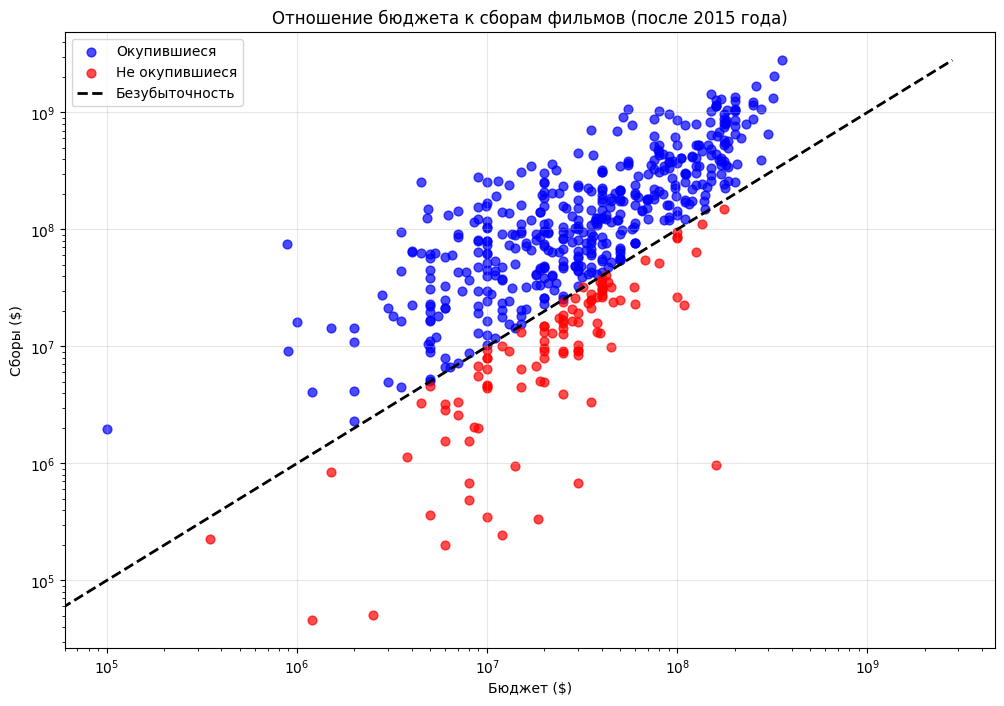

In [10]:
#отношение прибыли к бюджету

# Получаем данные
cursor.execute('''SELECT budget, gross FROM movlist
                  WHERE year > 2015 AND budget > 0 AND gross > 0
                ''')
results = cursor.fetchall()

# Разделяем данные
budgets = [row[0] for row in results]
grosses = [row[1] for row in results]

# Простая точечная диаграмма с цветовым кодированием
plt.figure(figsize=(12, 8))

# Разделяем на окупившиеся и неокупившиеся
profitable_budgets = [budget for budget, gross in results if gross/budget > 1]
profitable_grosses = [gross for budget, gross in results if gross/budget > 1]
unprofitable_budgets = [budget for budget, gross in results if gross/budget <= 1]
unprofitable_grosses = [gross for budget, gross in results if gross/budget <= 1]

plt.scatter(profitable_budgets, profitable_grosses, alpha=0.7, s=40,
           color='blue', label='Окупившиеся')
plt.scatter(unprofitable_budgets, unprofitable_grosses, alpha=0.7, s=40,
           color='red', label='Не окупившиеся')

plt.xlabel('Бюджет ($)')
plt.ylabel('Сборы ($)')
plt.title('Отношение бюджета к сборам фильмов (после 2015 года)')
plt.grid(True, alpha=0.3)

# Линия безубыточности
max_val = max(max(budgets), max(grosses))
plt.plot([0, max_val], [0, max_val], 'k--', linewidth=2, label='Безубыточность')

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()